In [4]:
import warnings

# Suppress only DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
)


In [2]:
# run langchain RAG
answers = []
contexts = []
test_questions = ["Give me a movie where the toys come to life?"]
for question in test_questions:
  response = responseRAG(question)
  answers.append(response["response"].content)
  contexts.append([context.page_content for context in response["context"]])
# make HF dataset
from datasets import Dataset

response_dataset = Dataset.from_dict({
    "question" : test_questions,
    "answer" : answers,
    "contexts" : contexts,
    "ground_truth" : test_groundtruths
})

# now you can run the evaluations

C:\Users\abhis\AppData\Local\Continuum\anaconda3\envs\streamlit\lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The function `format_tool_to_openai_function` was deprecated in LangChain 0.1.16 and will be removed in 0.3.0. Use langchain_core.utils.function_calling.convert_to_openai_function() instead.
  warn_deprecated(
C:\Users\abhis\AppData\Local\Continuum\anaconda3\envs\streamlit\lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


KeyError: 'intermediate_steps'

In [12]:
response

AgentExecutor(memory=ConversationBufferMemory(chat_memory=InMemoryChatMessageHistory(messages=[HumanMessage(content='Give me a movie where the toys come to life?'), AIMessage(content="Here are some movies where toys come to life:\n1. Small Soldiers: When missile technology is used to enhance toy action figures, the toys soon begin to take their battle programming too seriously.\n2. Puppet Master vs Demonic Toys: A group of toymakers seek to use Andre Toulon's formula to give life to a line of killer toys that they plan to unleash on Christmas Eve.\n3. Silent Night, Deadly Night 5: The Toy Maker: A young boy sees his father killed by a toy and must deal with the loss while mysterious killer toys appear.\n4. Pinocchio: Lonely toymaker Geppetto's wooden puppet Pinocchio is brought to life by the Blue Fairy and must prove he's worthy to become a real boy.\n5. The Last Mimzy: Two siblings develop special talents after finding a mysterious box of toys, leading them into a strange new world w

# I DIDNT KNOW THAT THE RETREIVED ANSWER WAS MANIPULATED BY THE RAG MODEL 

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul  3 13:13:14 2024

@author: abhis
"""


import streamlit as st
import requests
from dotenv import load_dotenv
import os
from datetime import datetime,timedelta
import pandas as pd
from modules import evaluation
import numpy as np
from openai import OpenAI
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

load_dotenv()

def responseRAG(prompt):
    client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])
    response = evaluation.chat_bot(prompt)   
    return response

question = "Give me a political Thriller?"
value = responseRAG(question) 
print(value)
# ground_truth = [" ".join(value['intermediate_steps'][0][1])]
# context = value['intermediate_steps'][0][1]
# answer = value['output']

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated field from a procedure. ('advertisedListenAddress' returned by 'gds.debug.arrow' is deprecated.)} {position: line: 1, column: 1, offset: 0} for query: 'CALL gds.debug.arrow()'
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated field from a procedure. ('serverLocation' returned by 'gds.debug.arrow' is deprecated.)} {position: line: 1, column: 1, offset: 0} for query: 'CALL gds.debug.arrow()'
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationW

TypeError: load_memory_variables() missing 1 required positional argument: 'inputs'

In [6]:
value[0]

[HumanMessage(content='Give me a political Thriller?'),
 AIMessage(content='Here are some political thriller movie recommendations for you:\n1. The Deal: A political thriller involving illegal oil trading, the Russian Mafia, and governmental cover-ups.\n2. 黑社會: A drama-thriller centered on a democratic election within an organized crime society.\n3. The Edge: A thriller about a troubled antiwar activist planning to assassinate the President of the United States, leading to government counterintelligence and political dilemmas.\n4. Casino Jack: Based on a true story, this movie follows a Washington DC lobbyist and his protégé as their influence-peddling schemes lead to corruption and murder.\n5. Anatomy of a Murder: A legal drama where a small-town lawyer faces off against a big city prosecutor in a murder case involving jealousy and seduction.')]

In [18]:
from datasets import Dataset
data = {
    "question": question,
    "answer": answer,
    "contexts": context,
    "ground_truths": ground_truth
}

print(data)
# Convert dict to dataset
dataset = Dataset.from_dict(data)

{'question': 'Give me a political Thriller?', 'answer': 'Here are some political thriller movie recommendations for you:\n1. The Deal: A political thriller involving illegal oil trading, the Russian Mafia, and governmental cover-ups.\n2. 黑社會: A drama-thriller centered on a democratic election within an organized crime society.\n3. The Edge: A thriller about a troubled antiwar activist planning to assassinate the President of the United States, leading to government counterintelligence and political dilemmas.\n4. Casino Jack: Based on a true story, this movie follows a Washington DC lobbyist and his protégé as their influence-peddling schemes lead to corruption and murder.\n5. Anatomy of a Murder: A legal drama where a small-town lawyer faces off against a big city prosecutor in a murder case involving jealousy and seduction.', 'contexts': ['The Deal : A political thriller steeped in illegal oil trading, the Russian Mafia, and governmental cover-ups.', '黑社會 : A drama-thriller centered o

ArrowInvalid: Column 1 named answer expected length 29 but got length 774

In [22]:
from datasets import Dataset

# Define the data
data = {
    "question": ["Give me a political Thriller?"],
    "answer": ["Here are some political thriller movie recommendations for you:\n1. The Deal: A political thriller involving illegal oil trading, the Russian Mafia, and governmental cover-ups.\n2. 黑社會: A drama-thriller centered on a democratic election within an organized crime society.\n3. The Edge: A thriller about a troubled antiwar activist planning to assassinate the President of the United States, leading to government counterintelligence and political dilemmas.\n4. Casino Jack: Based on a true story, this movie follows a Washington DC lobbyist and his protégé as their influence-peddling schemes lead to corruption and murder.\n5. Anatomy of a Murder: A legal drama where a small-town lawyer faces off against a big city prosecutor in a murder case involving jealousy and seduction."],
    "contexts": [['The Deal : A political thriller steeped in illegal oil trading, the Russian Mafia, and governmental cover-ups.', '黑社會 : A drama-thriller centered on a democratic election within an organized crime society.', 'The Edge : A troubled antiwar activist plans to assassinate the President of the United States. His resolve forces others in a fragmented and disillusioned group of political allies to face the threat of government counterintelligence and the temptations of middle-age security, and to reexamine their commitment to radical action.', 'Casino Jack : Based on a true story, a hot shot Washington DC lobbyist and his protégé go down hard as their schemes to peddle influence lead to corruption and murder.', 'Anatomy of a Murder : The film pits a humble small-town lawyer against a hard-headed big city prosecutor. Emotions flare as a jealous army lieutenant pleads innocent to murdering the rapist of his seductive, beautiful wife.']],
    "ground_truth": ["The Deal : A political thriller steeped in illegal oil trading, the Russian Mafia, and governmental cover-ups. 黑社會 : A drama-thriller centered on a democratic election within an organized crime society. The Edge : A troubled antiwar activist plans to assassinate the President of the United States. His resolve forces others in a fragmented and disillusioned group of political allies to face the threat of government counterintelligence and the temptations of middle-age security, and to reexamine their commitment to radical action. Casino Jack : Based on a true story, a hot shot Washington DC lobbyist and his protégé go down hard as their schemes to peddle influence lead to corruption and murder. Anatomy of a Murder : The film pits a humble small-town lawyer against a hard-headed big city prosecutor. Emotions flare as a jealous army lieutenant pleads innocent to murdering the rapist of his seductive, beautiful wife."]
}

# Convert dict to dataset
dataset = Dataset.from_dict(data)

print(dataset)

Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truth'],
    num_rows: 1
})


In [25]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
)

result = evaluate(
    dataset = dataset, 
    metrics=[
        context_recall,
        faithfulness,
        answer_relevancy,
    ],
)

df = result.to_pandas()

Exception in thread Thread-7:
Traceback (most recent call last):
  File "C:\Users\abhis\AppData\Local\Continuum\anaconda3\envs\streamlit\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\abhis\AppData\Local\Continuum\anaconda3\envs\streamlit\lib\site-packages\ragas\executor.py", line 87, in run
    results = self.loop.run_until_complete(self._aresults())
  File "C:\Users\abhis\AppData\Local\Continuum\anaconda3\envs\streamlit\lib\asyncio\base_events.py", line 592, in run_until_complete
    self._check_running()
  File "C:\Users\abhis\AppData\Local\Continuum\anaconda3\envs\streamlit\lib\asyncio\base_events.py", line 552, in _check_running
    raise RuntimeError('This event loop is already running')
RuntimeError: This event loop is already running


ExceptionInRunner: The runner thread which was running the jobs raised an exeception. Read the traceback above to debug it. You can also pass `raise_exceptions=False` incase you want to show only a warning message instead.

In [29]:
from ragas.langchain.evalchain import RagasEvaluatorChain
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_precision,
    context_recall,
)

# create evaluation chains
faithfulness_chain = RagasEvaluatorChain(metric=faithfulness)
answer_rel_chain = RagasEvaluatorChain(metric=answer_relevancy)
context_rel_chain = RagasEvaluatorChain(metric=context_precision)
context_recall_chain = RagasEvaluatorChain(metric=context_recall)

ModuleNotFoundError: No module named 'ragas.langchain'

# New Stuff

In [2]:
from langchain_openai import ChatOpenAI
from datasets import Dataset
from ragas import evaluate
from ragas.run_config import RunConfig
from ragas.metrics import (
    context_precision,
    faithfulness,
    answer_relevancy,
    context_recall,
    answer_correctness,
    answer_similarity
)
import streamlit as st
import requests
from dotenv import load_dotenv
import os
from datetime import datetime,timedelta
import pandas as pd
from modules import evaluation
import numpy as np
from openai import OpenAI
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

load_dotenv()




def responseRAG(prompt):
    client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])
    response = evaluation.chat_bot(prompt)   
    return response


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated field from a procedure. ('advertisedListenAddress' returned by 'gds.debug.arrow' is deprecated.)} {position: line: 1, column: 1, offset: 0} for query: 'CALL gds.debug.arrow()'
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated field from a procedure. ('serverLocation' returned by 'gds.debug.arrow' is deprecated.)} {position: line: 1, column: 1, offset: 0} for query: 'CALL gds.debug.arrow()'
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationW

In [8]:
%%
question = "Give me a political Thriller?"
value = responseRAG(question) 
print(value)


{'input': 'Give me a political Thriller?', 'chat_history': [HumanMessage(content='Give me a political Thriller?'), AIMessage(content='Here are some political thriller movie recommendations for you:\n1. The Deal: A political thriller steeped in illegal oil trading, the Russian Mafia, and governmental cover-ups.\n2. 黑社會: A drama-thriller centered on a democratic election within an organized crime society.\n3. The Edge: A troubled antiwar activist plans to assassinate the President of the United States, leading to a series of events involving political allies and government counterintelligence.\n4. Casino Jack: Based on a true story, this movie follows a Washington DC lobbyist and his protégé as their schemes lead to corruption and murder.\n5. Anatomy of a Murder: This film pits a humble small-town lawyer against a hard-headed big city prosecutor in a courtroom drama involving a murder case.')], 'output': 'Here are some political thriller movie recommendations for you:\n1. The Deal: A pol

In [4]:
answer = value['output']
context = value['intermediate_steps'][0][1]
print(context)
print(answer)

['The Deal : A political thriller steeped in illegal oil trading, the Russian Mafia, and governmental cover-ups.', '黑社會 : A drama-thriller centered on a democratic election within an organized crime society.', 'The Edge : A troubled antiwar activist plans to assassinate the President of the United States. His resolve forces others in a fragmented and disillusioned group of political allies to face the threat of government counterintelligence and the temptations of middle-age security, and to reexamine their commitment to radical action.', 'Casino Jack : Based on a true story, a hot shot Washington DC lobbyist and his protégé go down hard as their schemes to peddle influence lead to corruption and murder.', 'Anatomy of a Murder : The film pits a humble small-town lawyer against a hard-headed big city prosecutor. Emotions flare as a jealous army lieutenant pleads innocent to murdering the rapist of his seductive, beautiful wife.']
Here are some political thriller movie recommendations fo

In [7]:
from datasets import Dataset 
from ragas.metrics import faithfulness
from ragas import evaluate

data_samples = {
    'question': [question],
    'answer': [answer],
    'contexts' : [context],
}
dataset = Dataset.from_dict(data_samples)
score = evaluate(dataset,metrics=[faithfulness,answer_relevancy])
score.to_pandas()

ValueError: The metric [context_precision] that that is used requires the following additional columns ['ground_truth'] to be present in the dataset. Looks like you're trying to use 'context_precision' without ground_truth. Please use consider using  `context_utilization' instead.

# Scaled

In [50]:
import time


# questions = ['give me a movie where the main character has to survive in a haunted house?',
#              'I once saw a movie where the toys come to life but cannot recall the movie name - can you help me find it?',
#              'I’m looking for a movie that features time travel as a central theme. Can you find some movies with this keyword?',
#             'Give me a political Thriller?','Give me a movie about teenagers in school?']
questions = [
    "Can you recommend a movie where a group of friends goes on a road trip?",
    "I'm looking for a film about a detective solving a complex murder mystery. Any suggestions?",
    "Do you know any movies where the main character is stranded on a deserted island?",
    "Can you find a movie about a heist or robbery?",
    "I'm interested in a movie that revolves around a courtroom drama. Can you help me find one?",
    "Could you recommend a film that features a love story set during a historical event?",
    "Do you have any suggestions for movies where the protagonist has to survive in a post-apocalyptic world?",
    "Can you find a movie about a sports team overcoming challenges to win a championship?",
    "I'm looking for a film that deals with artificial intelligence or robots. Any recommendations?",
    "Can you recommend a movie where the plot centers around a musician or a band?"
]


all_answers = []
all_contexts = []
latency = []
for question in questions:
    t0 = time.time()
    value = responseRAG(question) 
    t1 = time.time()
    
    time_taken = t1-t0
    
    answer = value['output']
    context = value['intermediate_steps'][0][1]
    all_answers.append(answer)
    all_contexts.append(context)
    latency.append(time_taken)

from datasets import Dataset 
from ragas.metrics import faithfulness
from ragas import evaluate

data_samples = {
    'question': questions,
    'answer': all_answers,
    'contexts' : all_contexts,
}
dataset = Dataset.from_dict(data_samples)
score = evaluate(dataset,metrics=[faithfulness,answer_relevancy])
metrics = score.to_pandas()
metrics['latency'] = latency

print(metrics)

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

                                            question  \
0  Can you recommend a movie where a group of fri...   
1  I'm looking for a film about a detective solvi...   
2  Do you know any movies where the main characte...   
3     Can you find a movie about a heist or robbery?   
4  I'm interested in a movie that revolves around...   
5  Could you recommend a film that features a lov...   
6  Do you have any suggestions for movies where t...   
7  Can you find a movie about a sports team overc...   
8  I'm looking for a film that deals with artific...   
9  Can you recommend a movie where the plot cente...   

                                              answer  \
0  Here are some movie recommendations where a gr...   
1  Here are some film suggestions about a detecti...   
2  Here are some movies where the main character ...   
3  Here are some movies about heists or robberies...   
4  I recommend watching "12 Angry Men." It revolv...   
5  I recommend the film "Three Comrades," which

In [20]:
metrics

,question,answer,contexts,faithfulness,answer_relevancy,latency
0,give me a movie where the main character has t...,Here are some movies where the main character ...,[21 Days : Three filmmakers embark on a parano...,1.0,0.954453,5.267386
1,I once saw a movie where the toys come to life...,"Based on your description, the movie you are r...","[Silent Night, Deadly Night 5: The Toy Maker :...",0.0,0.836795,4.196383
2,I’m looking for a movie that features time tra...,Here are some movies that feature time travel ...,"[La Jetée : Time travel, still images, a past,...",1.0,0.935361,4.865224
3,Give me a political Thriller?,Here are some political thriller movie recomme...,[The Deal : A political thriller steeped in il...,1.0,0.933070,4.640753


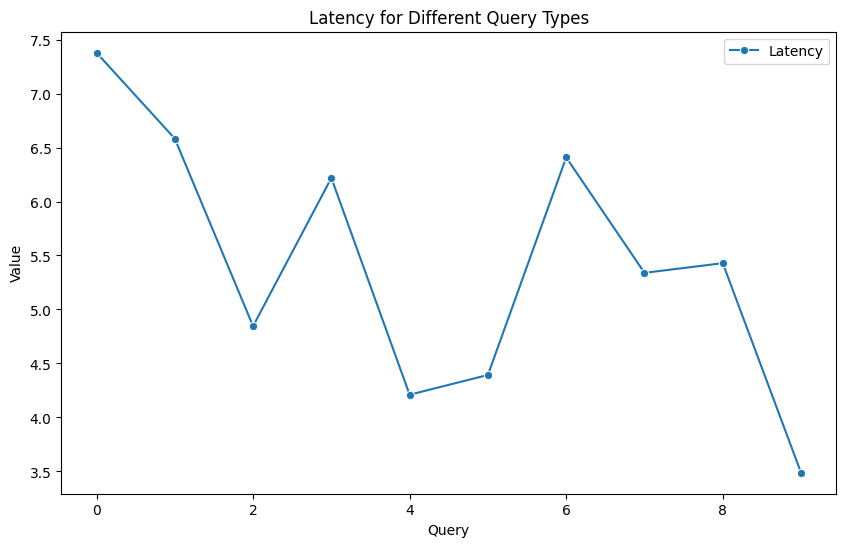

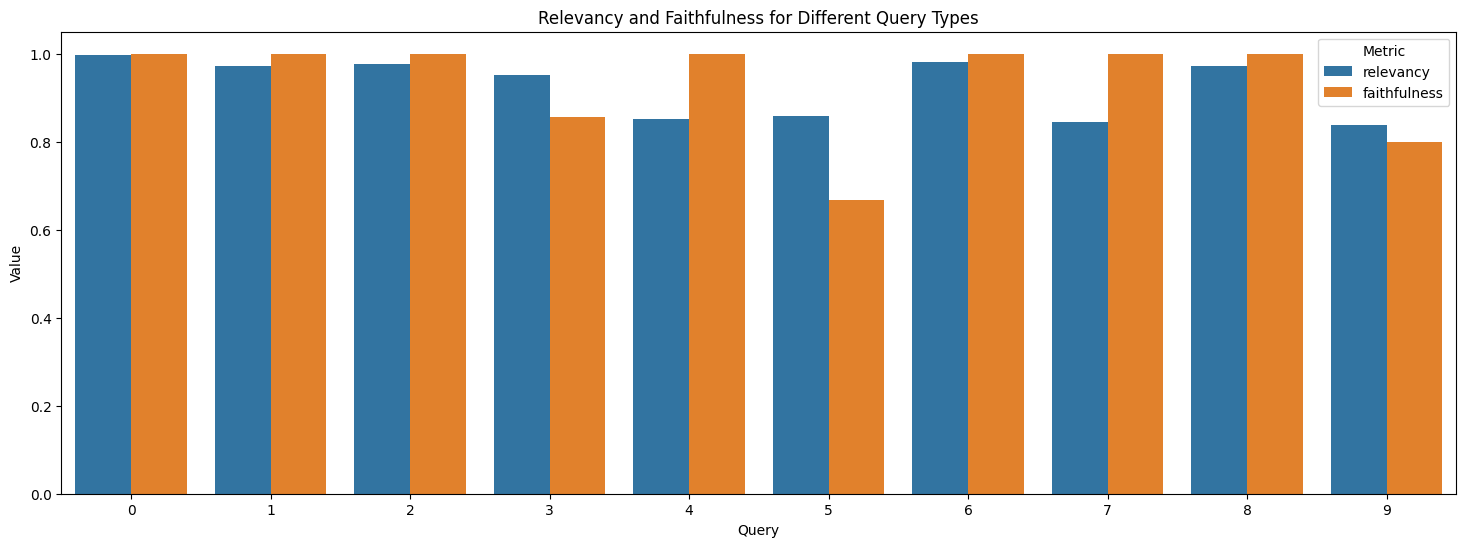

In [57]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'query': [i for i in range(len(list(metrics['question'])))],
    'relevancy': list(metrics['answer_relevancy']),
    'latency': list(metrics['latency']),
    'faithfulness': list(metrics['faithfulness'])
}

df = pd.DataFrame(data)

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='query', y='latency', data=df, marker='o', label='Latency')
plt.xlabel('Query')
plt.ylabel('Value')
plt.title('Latency for Different Query Types')
plt.legend()
plt.show()

# # Create a line plot
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='query', y='relevancy', data=df, marker='o', label='Relevancy')
# sns.lineplot(x='query', y='faithfulness', data=df, marker='o', label='Faithfulness')
# plt.xlabel('Query')
# plt.ylabel('Value')
# plt.title('Latency for Different Query Types')
# plt.legend()
# plt.show()
# Melt the DataFrame for easier plotting with Seaborn
df_melted = df.melt(id_vars='query', value_vars=['relevancy', 'faithfulness'], var_name='Metric', value_name='Value')

# Create a bar plot
plt.figure(figsize=(18, 6))
sns.barplot(x='query', y='Value', hue='Metric', data=df_melted)
plt.xlabel('Query')
plt.ylabel('Value')
plt.title('Relevancy and Faithfulness for Different Query Types')
plt.legend(title='Metric')
plt.show()

In [44]:
data

{'query': [0, 1, 2, 3],
 'relevancy': [0.9544530496862108,
  0.8367950386196235,
  0.9353614141317533,
  0.9330698858187086],
 'latency': [5.267385721206665,
  4.196383476257324,
  4.8652238845825195,
  4.6407530307769775]}

https://towardsdatascience.com/evaluating-rag-applications-with-ragas-81d67b0ee31a#c52f

https://docs.ragas.io/en/stable/index.html

https://medium.com/@zilliz_learn/optimizing-rag-applications-a-guide-to-methodologies-metrics-and-evaluation-tools-for-enhanced-a9ae3d9c7149#:~:text=Ground%20truth%20metrics%20involve%20comparing,friendliness%2C%20harmfulness%2C%20and%20conciseness.
https://www.humanfirst.ai/blog/rag-evaluation

https://neo4j.com/labs/genai-ecosystem/#_neo4j_genai_features

https://www.youtube.com/watch?v=SlMqsayqUHM